In [ ]:
# Experiment 4 KD with a much smaller model as student

In [31]:
# Split the training data into validation set and training set use a stratified k fold 
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Knowledge distillation 
# Modified from source: https://keras.io/examples/vision/knowledge_distillation/

import Distiller

In [87]:
# Set up dataset
california_housing_data_train = pd.read_csv('Data/california_housing_train.txt')
california_housing_data_test = pd.read_csv('Data/california_housing_test.txt')

print(california_housing_data_train.shape)

(16512, 9)


In [88]:
#print(california_housing_data_train)

In [89]:
# Perform the stratified 10 fold cross validation
number_of_folds = 2

kfolds = KFold(n_splits=number_of_folds)

# x_train = california_housing_data_train.iloc[:,0:7].to_numpy()


x_train = california_housing_data_train.iloc[:,0:1].to_numpy()
y_train = california_housing_data_train.iloc[:,-1].to_numpy()

# x_test = california_housing_data_test.iloc[:,0:7].to_numpy(
x_test = california_housing_data_test.iloc[:,0:1].to_numpy()
y_test = california_housing_data_test.iloc[:,-1].to_numpy()

In [90]:
# Preprocessing
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

#x_validation = scaler.fit_transform(x_validation)

x_test = scaler.fit_transform(x_test)


In [91]:
# Build the student model

def buildTeacherModel():
    model = models.Sequential()
    
    model.add(layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]))
    #model.add(layers.Dense(4, activation='relu'))
    #model.add(layers.Dense(1, activation='relu'))
    model.add(layers.Dense(1))    
    
    return model

In [92]:
# Construct/load models
teacher_model = buildTeacherModel()

In [93]:
# Haperparameter used in the experiment
number_of_epochs = 20

for i, (train_index, val_index) in enumerate(kfolds.split(x_train, y_train)):

    x_train_fold = x_train[train_index]
    y_train_fold = y_train[train_index]
    
    x_val_fold = x_train[val_index]
    y_val_fold = y_train[val_index]
    
    teacher_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.mean_squared_error,
    )
    
    history = teacher_model.fit(
        x_train_fold, 
        y_train_fold, 
        epochs=number_of_epochs, 
        validation_data=(x_val_fold, y_val_fold)
    )

Epoch 1/20
258/258 [==============================] - 1s 2ms/step - loss: 2.1865 - val_loss: 0.9231
Epoch 2/20
258/258 [==============================] - 1s 2ms/step - loss: 0.7590 - val_loss: 0.7473
Epoch 3/20
258/258 [==============================] - 1s 2ms/step - loss: 0.6950 - val_loss: 0.7242
Epoch 4/20
258/258 [==============================] - 1s 2ms/step - loss: 0.6871 - val_loss: 0.7165
Epoch 5/20
258/258 [==============================] - 1s 2ms/step - loss: 0.6833 - val_loss: 0.7132
Epoch 6/20
258/258 [==============================] - 1s 2ms/step - loss: 0.6822 - val_loss: 0.7116
Epoch 7/20
258/258 [==============================] - 1s 2ms/step - loss: 0.6809 - val_loss: 0.7101
Epoch 8/20
258/258 [==============================] - 1s 2ms/step - loss: 0.6796 - val_loss: 0.7091
Epoch 9/20
258/258 [==============================] - 1s 3ms/step - loss: 0.6786 - val_loss: 0.7099
Epoch 10/20
258/258 [==============================] - 1s 2ms/step - loss: 0.6782 - val_loss: 0.7093

In [94]:
#print(history.history)

print(y_test.shape)

print(y_test)

(4128,)
[0.713 2.26  2.362 ... 3.078 2.092 1.03 ]


In [95]:
# teacher_model.evaluate(x_test, y_test, return_dict= True)
prediction = teacher_model.predict(x_test)

129/129 [==============================] - 0s 886us/step


In [96]:
# With less features the model is actually perform better. Indicates feature selection is required.
rfScore=r2_score(y_test,prediction)

print(rfScore)

print(prediction)

0.48275980054958145
[[1.2558008]
 [3.0080855]
 [2.1496642]
 ...
 [3.4062479]
 [2.2723258]
 [1.8714451]]


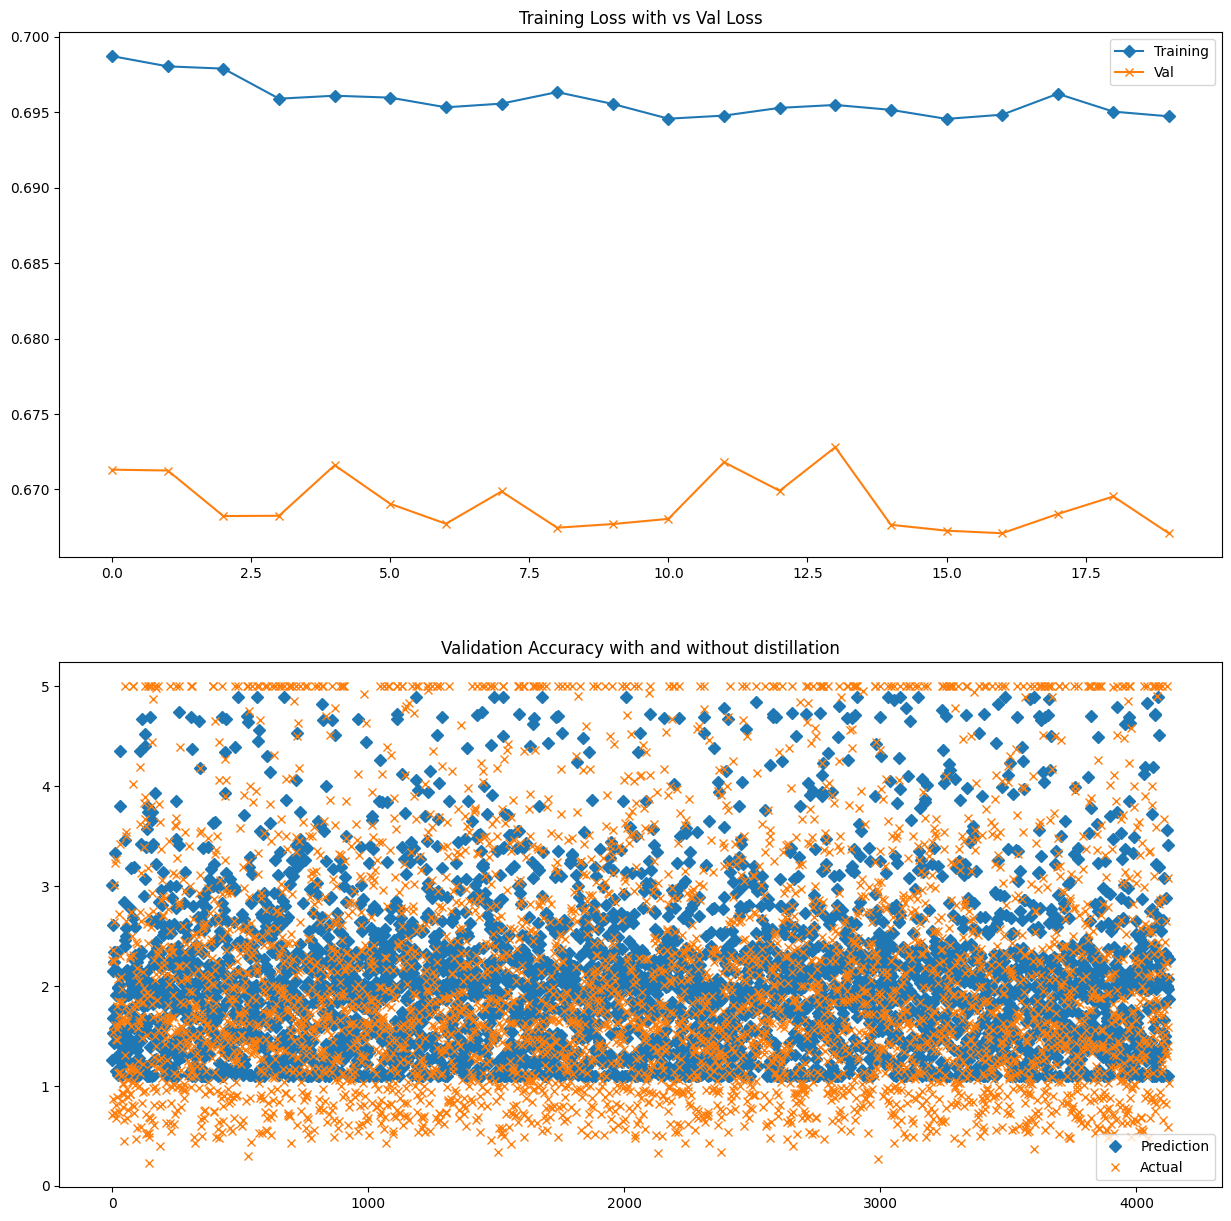

In [97]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

# Traning and validation results
axs[0].plot(history.history['loss'], '-D') 
axs[0].plot(history.history['val_loss'], '-x') 
axs[0].title.set_text('Training Loss with vs Val Loss') 
axs[0].legend(['Training', 'Val'])  

# Test results
axs[1].plot(prediction, 'D') 
axs[1].plot(y_test, 'x') 
axs[1].title.set_text('Validation Accuracy with and without distillation') 
axs[1].legend(['Prediction', 'Actual'])

In [9]:
print(f"Test accuracy with disstillation {test_results_with_distillation['sparse_categorical_accuracy']}")
print(f"Test accuracy without disstillation {test_results_without_distillation['sparse_categorical_accuracy']}")

Test accuracy with disstillation 0.9555000066757202
Test accuracy without disstillation 0.9648000001907349


In [1]:
# # # Save the model to load in future
# %mkdir ExpModels/Exp5

# studnet_model.save('ExpModels/Exp5/studnet_model')
# studnet_model_without_distillation.save('Exp1Models/Exp5/studnet_model_without_distillation')

The syntax of the command is incorrect.


NameError: name 'studnet_model' is not defined